In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
#import the data set
data=pd.read_csv('HCV-Egy-Data.csv')

In [3]:
#looking at the first five datapoint
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [4]:
#Explore Data
data.columns

Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

In [5]:
#Rename Columns
data.columns=['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting','Headache ',
       'Diarrhea','Fatigue','Jaundice',
       'Epigastric_pain ', 'WBC','RBC','HGB', 'Plat','AST_1','ALT_1',
       'ALT_4', 'ALT_12','ALT_24','ALT_36','ALT 48','ALT_after_24w',
       'RNA_Base','RNA 4','RNA_12', 'RNA_EOT','RNA_EF',
       'Baseline_histological_Grading','Baselinehistological_staging']

In [6]:
data.columns = data.columns.str.strip()

In [7]:
# Checking data types and non null data for each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age                            1385 non-null   int64
 1   Gender                         1385 non-null   int64
 2   BMI                            1385 non-null   int64
 3   Fever                          1385 non-null   int64
 4   Nausea/Vomting                 1385 non-null   int64
 5   Headache                       1385 non-null   int64
 6   Diarrhea                       1385 non-null   int64
 7   Fatigue                        1385 non-null   int64
 8   Jaundice                       1385 non-null   int64
 9   Epigastric_pain                1385 non-null   int64
 10  WBC                            1385 non-null   int64
 11  RBC                            1385 non-null   int64
 12  HGB                            1385 non-null   int64
 13  Plat              

In [8]:
#look at the five number of data
data.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue,Jaundice,Epigastric_pain,...,ALT_36,ALT 48,ALT_after_24w,RNA_Base,RNA 4,RNA_12,RNA_EOT,RNA_EF,Baseline_histological_Grading,Baselinehistological_staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


In [9]:
#Checking if any data is null
data.isnull().sum().sum()

0

In [10]:
#Change the classes columns to categorical for better visualization 

#categorize columns: Gender,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue,Jaundice, se[]
data_cat=data[['Gender','Fever','Nausea/Vomting','Headache','Fatigue','Jaundice','Diarrhea','Epigastric_pain',"Baselinehistological_staging"]] 

In [11]:
#Check the first five varible of the new cagetory data
data_cat.head()

,Gender,Fever,Nausea/Vomting,Headache,Fatigue,Jaundice,Diarrhea,Epigastric_pain,Baselinehistological_staging
0,1,2,1,1,2,2,1,2,2
1,1,1,2,2,2,2,1,1,2
2,1,2,2,2,1,1,2,1,4
3,2,1,2,1,1,2,2,1,3
4,1,1,1,2,2,2,1,2,1


In [12]:
#Change all the datatype in the cagetory table into cagetory instead of interger
data_cat=data_cat.astype('category')

In [13]:

data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Gender                        1385 non-null   category
 1   Fever                         1385 non-null   category
 2   Nausea/Vomting                1385 non-null   category
 3   Headache                      1385 non-null   category
 4   Fatigue                       1385 non-null   category
 5   Jaundice                      1385 non-null   category
 6   Diarrhea                      1385 non-null   category
 7   Epigastric_pain               1385 non-null   category
 8   Baselinehistological_staging  1385 non-null   category
dtypes: category(9)
memory usage: 13.2 KB


In [14]:
#Replacing the values to names e.g. 1:Male,2:Female 1:Absent,2:present 
data_cat['Gender'].replace([1,2],['Male','Female'],inplace=True)
data_cat['Gender']

0         Male
1         Male
2         Male
3       Female
4         Male
         ...  
1380      Male
1381      Male
1382      Male
1383      Male
1384    Female
Name: Gender, Length: 1385, dtype: object

In [15]:
#check for the unique values for the other columns(Symptoms):
Symptoms_cols=data_cat[["Fever","Nausea/Vomting","Headache","Fatigue","Jaundice","Diarrhea",'Epigastric_pain']]

Symptoms_cols_values = data_cat[["Fever","Nausea/Vomting","Headache","Fatigue","Jaundice","Diarrhea",'Epigastric_pain']].values
unique_values =  np.unique(Symptoms_cols_values)

print(unique_values)

[1 2]


In [16]:
#Replacing values (1-2) to (Absent,Present) in Symptoms Features:

data_cat['Fever'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Nausea/Vomting'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Headache'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Fatigue'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Jaundice'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Diarrhea'].replace([1,2],['Absent','Present'],inplace=True)
data_cat['Epigastric_pain'].replace([1,2],['Absent','Present'],inplace=True)

In [17]:
data_cat['Baselinehistological_staging'].unique()

[2, 4, 3, 1]
Categories (4, int64): [2, 4, 3, 1]

In [18]:
data_cat['Baselinehistological_staging'].replace([0,1,2,3,4],['No Fibrosis','Portal Fibrosis','Few Septa','Many Septa','Cirrhosis'],inplace=True)

In [19]:
data_cat.head()

,Gender,Fever,Nausea/Vomting,Headache,Fatigue,Jaundice,Diarrhea,Epigastric_pain,Baselinehistological_staging
0,Male,Present,Absent,Absent,Present,Present,Absent,Present,Few Septa
1,Male,Absent,Present,Present,Present,Present,Absent,Absent,Few Septa
2,Male,Present,Present,Present,Absent,Absent,Present,Absent,Cirrhosis
3,Female,Absent,Present,Absent,Absent,Present,Present,Absent,Many Septa
4,Male,Absent,Absent,Present,Present,Present,Absent,Present,Portal Fibrosis



--------Gender------------
['Male' 'Female']


Male      707
Female    678
Name: Gender, dtype: int64


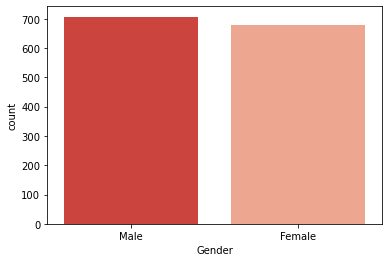

In [20]:
print('\n--------Gender------------')
print(data_cat['Gender'].unique())
print('\n')
print(data_cat['Gender'].value_counts())
sns.countplot(data_cat['Gender'],palette="Reds_r")
plt.show()


--------Gender------------
['Male' 'Female']


Male      707
Female    678
Name: Gender, dtype: int64


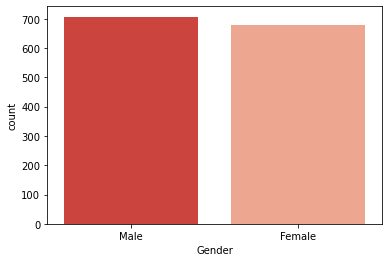

In [21]:
print('\n--------Gender------------')
print(data_cat['Gender'].unique())
print('\n')
print(data_cat['Gender'].value_counts())
sns.countplot(data_cat['Gender'],palette="Reds_r")
plt.show()


--------Baselinehistological_staging------------
['Few Septa' 'Cirrhosis' 'Many Septa' 'Portal Fibrosis']


Cirrhosis          362
Many Septa         355
Portal Fibrosis    336
Few Septa          332
Name: Baselinehistological_staging, dtype: int64


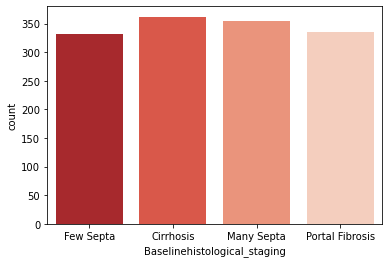

In [22]:
print('\n--------Baselinehistological_staging------------')
print(data_cat['Baselinehistological_staging'].unique())
print('\n')
print(data_cat['Baselinehistological_staging'].value_counts())
sns.countplot(data_cat['Baselinehistological_staging'],palette="Reds_r")
plt.show()

In [23]:
data_num=data[['Age','BMI','WBC','RBC','HGB','Plat','AST_1','ALT_1','ALT_4','ALT_12','ALT_24','ALT_36','ALT 48','ALT_after_24w','RNA_Base','RNA 4','RNA_12','ALT_24','RNA_EOT','RNA_EF','Baseline_histological_Grading']] 

In [24]:
data_num.describe()

,Age,BMI,WBC,RBC,HGB,Plat,AST_1,ALT_1,ALT_4,ALT_12,...,ALT_36,ALT 48,ALT_after_24w,RNA_Base,RNA 4,RNA_12,ALT_24,RNA_EOT,RNA_EF,Baseline_histological_Grading
count,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.00000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,28.608664,7533.386282,4.422130e+06,12.587726,158348.06065,82.774729,83.916245,83.405776,83.510469,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,83.709025,287660.336462,291378.290975,9.761733
std,8.781506,4.076215,2668.220333,3.463577e+05,1.713511,38794.78555,25.993242,25.922800,26.529730,26.064478,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,26.205994,264559.525070,267700.691713,4.023896
min,32.000000,22.000000,2991.000000,3.816422e+06,10.000000,93013.00000,39.000000,39.000000,39.000000,39.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,39.000000,5.000000,5.000000,3.000000
25%,39.000000,25.000000,5219.000000,4.121374e+06,11.000000,124479.00000,60.000000,62.000000,61.000000,60.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,61.000000,5.000000,5.000000,6.000000
50%,46.000000,29.000000,7498.000000,4.438465e+06,13.000000,157916.00000,83.000000,83.000000,82.000000,84.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,83.000000,251376.000000,244049.000000,10.000000
75%,54.000000,32.000000,9902.000000,4.721279e+06,14.000000,190314.00000,105.000000,106.000000,107.000000,106.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,107.000000,517806.000000,527864.000000,13.000000
max,61.000000,35.000000,12101.000000,5.018451e+06,15.000000,226464.00000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,128.000000,808450.000000,810333.000000,16.000000


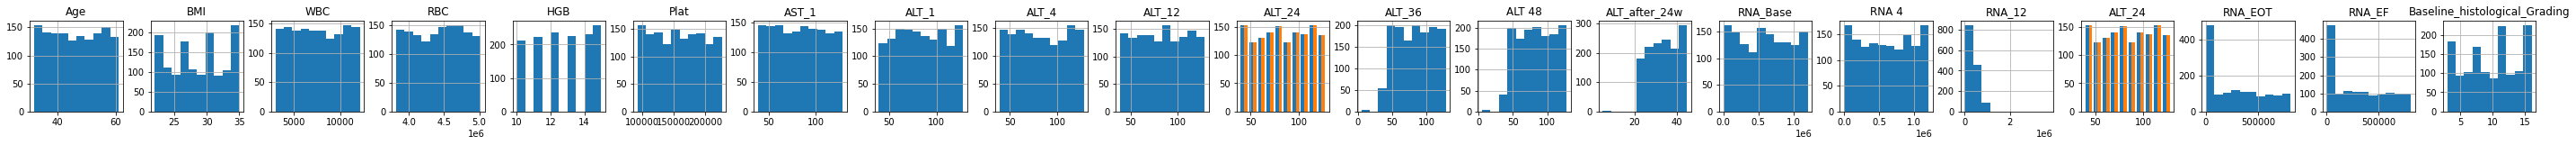

In [25]:
data_num.hist(layout=(21,21), sharex=False, sharey=False, figsize=(50, 50), bins=10)
plt.show()

In [26]:
data_num_log = np.log(data_num)

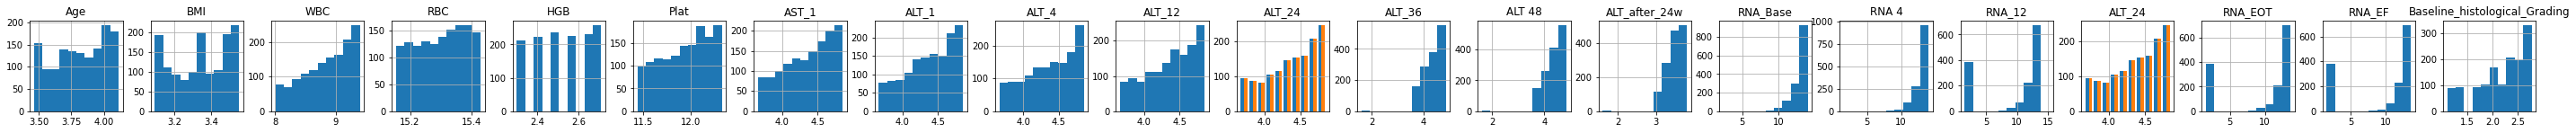

In [27]:
data_num_log.hist(layout=(21,21), sharex=False, sharey=False, figsize=(50, 50), bins=10)
plt.show()

In [28]:
from sklearn.decomposition import PCA
pca=PCA(n_components=21)
pca.fit(data_num_log)


PCA(n_components=21)

In [29]:
print(pca.components_)

[[ 8.58235923e-04  6.65091053e-04  8.31165077e-04  3.62651108e-04
   6.54235082e-06 -8.29928683e-04  5.25712731e-04 -7.22612824e-05
  -8.22314215e-04  1.21613295e-03 -4.66544375e-04 -1.11943456e-03
  -9.24281225e-04 -1.73543907e-04 -7.12062694e-04  5.25118802e-03
  -5.76118729e-01 -4.66544375e-04 -5.78285074e-01 -5.77612049e-01
   1.45670770e-03]
 [-1.97469710e-03 -3.17970426e-03 -8.30244302e-03 -1.16547378e-03
   5.02581634e-03  2.20397845e-03 -1.00423746e-03  8.37377616e-04
   4.50125229e-03  1.84580472e-03  1.39871299e-02  7.92522956e-03
  -7.69026139e-03 -2.94889124e-03 -2.01731811e-01 -9.56620259e-01
  -4.28523323e-02  1.39871299e-02 -1.23993385e-01  1.58467850e-01
   3.46048835e-02]
 [-3.12830861e-03  2.42336554e-03  1.76118179e-03  4.28003883e-04
   4.94729459e-03  9.67372668e-03 -3.87461873e-03 -1.11683769e-02
   1.00075155e-02 -1.39528889e-03 -1.00878450e-02 -1.69464647e-03
  -4.45673898e-03 -3.88952887e-03 -9.74253127e-01  2.15294354e-01
  -3.92594993e-02 -1.00878450e-02 -5.1

In [30]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age                            1385 non-null   int64
 1   BMI                            1385 non-null   int64
 2   WBC                            1385 non-null   int64
 3   RBC                            1385 non-null   int64
 4   HGB                            1385 non-null   int64
 5   Plat                           1385 non-null   int64
 6   AST_1                          1385 non-null   int64
 7   ALT_1                          1385 non-null   int64
 8   ALT_4                          1385 non-null   int64
 9   ALT_12                         1385 non-null   int64
 10  ALT_24                         1385 non-null   int64
 11  ALT_36                         1385 non-null   int64
 12  ALT 48                         1385 non-null   int64
 13  ALT_after_24w     

In [31]:
print(pca.explained_variance_)

[7.28165324e+01 1.28629927e+00 1.12681825e+00 1.02021985e+00
 7.55157299e-01 2.45402085e-01 2.30588595e-01 1.55598218e-01
 1.42645740e-01 1.19242621e-01 1.16260399e-01 1.15473258e-01
 1.12242938e-01 1.03914125e-01 6.43117189e-02 5.03191371e-02
 3.74531976e-02 2.11418201e-02 1.84984006e-02 6.11018997e-03
 1.37548097e-33]


In [32]:
print(pca.explained_variance_ratio_)

[9.27076793e-01 1.63767508e-02 1.43462894e-02 1.29891128e-02
 9.61442112e-03 3.12438083e-03 2.93578022e-03 1.98102673e-03
 1.81611993e-03 1.51815890e-03 1.48019021e-03 1.47016857e-03
 1.42904118e-03 1.32300140e-03 8.18796229e-04 6.40647154e-04
 4.76842128e-04 2.69170890e-04 2.35515718e-04 7.77929837e-05
 1.75121837e-35]


[92.71 94.35 95.78 97.08 98.04 98.35 98.64 98.84 99.02 99.17 99.32 99.47
 99.61 99.74 99.82 99.88 99.93 99.96 99.98 99.99 99.99]


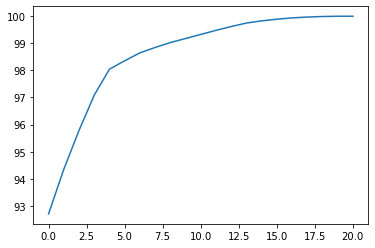

In [33]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)

In [34]:
pca3 = PCA(n_components=3)
pca3.fit(data_num_log)
X=pca3.fit_transform(data_num_log)
print(X)

[[ 7.43547764 -0.87270155 -0.7858461 ]
 [-4.50423342 -0.22854618  2.19194195]
 [ 0.15245147 -0.07213641  0.29077034]
 ...
 [-5.60153824 -0.54776858 -0.35895816]
 [-3.3421329   2.53364843  0.7659723 ]
 [13.74370207 -0.51419641 -0.97193752]]


In [35]:
print(pca3.explained_variance_ratio_)

[0.92707679 0.01637675 0.01434629]


In [43]:
data_num.corr(method='pearson')

,Age,BMI,WBC,RBC,HGB,Plat,AST_1,ALT_1,ALT_4,ALT_12,...,ALT_36,ALT 48,ALT_after_24w,RNA_Base,RNA 4,RNA_12,ALT_24,RNA_EOT,RNA_EF,Baseline_histological_Grading
Age,1.000000,-0.025353,0.014310,-0.002162,-0.012810,-0.002225,-0.016633,0.005723,0.030260,0.019046,...,-0.008721,0.027557,0.003865,0.022775,-0.012699,0.001578,0.002712,-0.048702,-0.030297,-0.040705
BMI,-0.025353,1.000000,0.036721,-0.004922,0.057987,-0.003093,0.001806,0.034037,0.001416,-0.059659,...,-0.029995,-0.007866,-0.021412,-0.016418,0.036864,-0.009190,0.007909,-0.021428,-0.044901,-0.023045
WBC,0.014310,0.036721,1.000000,0.006928,0.008786,-0.013097,-0.006985,-0.038014,-0.012926,-0.002510,...,-0.042220,-0.014509,0.015662,0.014624,0.022240,-0.051714,-0.012506,-0.020162,-0.046780,0.029627
RBC,-0.002162,-0.004922,0.006928,1.000000,0.042320,0.032431,0.016259,0.011785,-0.027478,0.017021,...,0.050956,-0.055826,0.008924,0.006175,0.015718,-0.061851,0.015090,-0.025721,-0.003407,-0.019662
HGB,-0.012810,0.057987,0.008786,0.042320,1.000000,-0.010320,-0.010636,-0.014767,0.022724,-0.006641,...,-0.037597,-0.028357,-0.020790,-0.053244,-0.002525,0.008311,0.004213,-0.006389,0.003589,0.021163
Plat,-0.002225,-0.003093,-0.013097,0.032431,-0.010320,1.000000,-0.005205,0.047587,-0.025471,-0.043581,...,0.004298,-0.003865,-0.032826,-0.041284,-0.038771,0.050038,-0.003090,0.037340,0.005712,0.033985
AST_1,-0.016633,0.001806,-0.006985,0.016259,-0.010636,-0.005205,1.000000,0.037943,0.006913,-0.011067,...,-0.007779,-0.009569,0.001885,-0.001739,-0.010652,-0.003321,-0.012951,-0.045388,-0.005010,-0.027110
ALT_1,0.005723,0.034037,-0.038014,0.011785,-0.014767,0.047587,0.037943,1.000000,-0.033151,-0.046876,...,-0.012609,0.031877,-0.004512,0.036358,-0.013260,0.016020,-0.040785,-0.039380,-0.026100,-0.010173
ALT_4,0.030260,0.001416,-0.012926,-0.027478,0.022724,-0.025471,0.006913,-0.033151,1.000000,0.004047,...,0.015907,-0.004701,0.019454,-0.012893,-0.010625,0.005007,0.028424,0.053357,0.014059,-0.027636
ALT_12,0.019046,-0.059659,-0.002510,0.017021,-0.006641,-0.043581,-0.011067,-0.046876,0.004047,1.000000,...,-0.006074,0.007503,-0.025438,-0.036839,-0.016887,-0.026248,0.021715,-0.027191,-0.022089,-0.002518


In [45]:
final_num_dât=

,Age,BMI,WBC,HGB,Plat,AST_1,ALT_1,ALT_4,ALT_12,ALT_24,ALT_36,ALT 48,ALT_after_24w,RNA_Base,RNA 4,RNA_12,ALT_24,RNA_EOT,RNA_EF,Baseline_histological_Grading
0,56,35,7425,14,112132,99,84,52,109,81,5,5,5,655330,634536,288194,81,5,5,13
1,46,29,12101,10,129367,91,123,95,75,113,57,123,44,40620,538635,637056,113,336804,31085,4
2,57,33,4178,12,151522,113,49,95,107,116,5,5,5,571148,661346,5,116,735945,558829,4
3,49,33,6490,10,146457,43,64,109,80,88,48,77,33,1041941,449939,585688,88,744463,582301,10
4,59,32,3661,11,187684,99,104,67,48,120,94,90,30,660410,738756,3731527,120,338946,242861,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,29,7044,15,202520,122,59,78,106,127,63,44,45,387795,55938,5,127,5,5,15
1381,55,34,6207,10,115776,128,102,65,99,108,97,64,41,481378,152961,393339,108,73574,236273,10
1382,42,26,4913,14,128354,61,93,123,61,116,87,39,24,612664,572756,806109,116,343719,160457,6
1383,52,29,7257,10,205908,70,97,104,74,47,48,81,43,139872,76161,515730,47,2460,696074,15


In [49]:
final_num_data=data_num[['Age','RNA_EOT','RNA_EF','Baseline_histological_Grading']]

In [50]:
final_num_data

,Age,RNA_EOT,RNA_EF,Baseline_histological_Grading
0,56,5,5,13
1,46,336804,31085,4
2,57,735945,558829,4
3,49,744463,582301,10
4,59,338946,242861,11
...,...,...,...,...
1380,44,5,5,15
1381,55,73574,236273,10
1382,42,343719,160457,6
1383,52,2460,696074,15


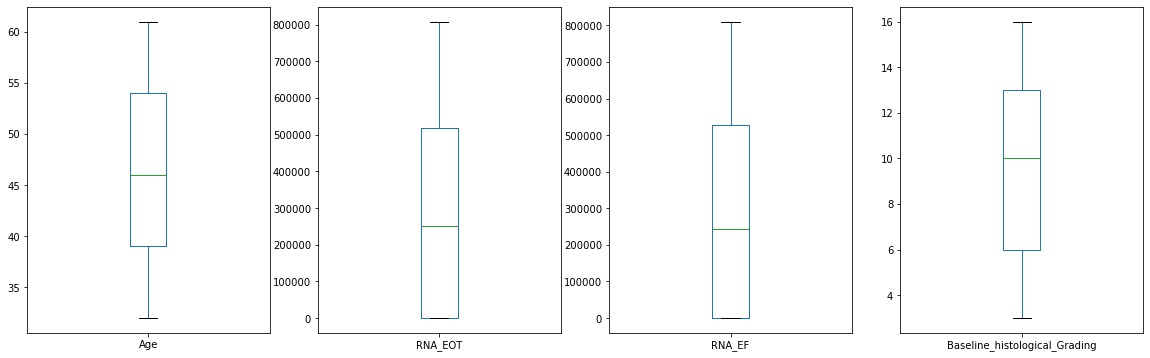

In [55]:
final_num_data.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(20,6))
plt.show()